In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Figure 2

In [2]:
alphas = [np.load(f'./data/Figure 2/Results_alpha{a}.npy') for a in np.arange(0,101,25)]

In [ ]:
# The items are arrays: [num_lesions, task, epoch number, seed].
# Gabor tasks are angle, color or angle, size.

In [3]:
alphas[0].shape

(4, 2, 12, 10)

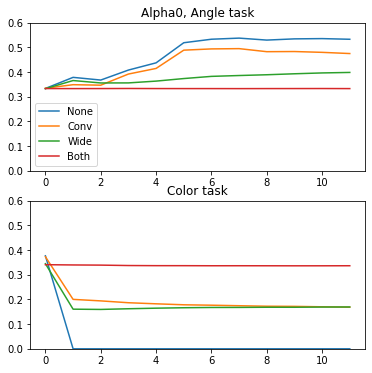

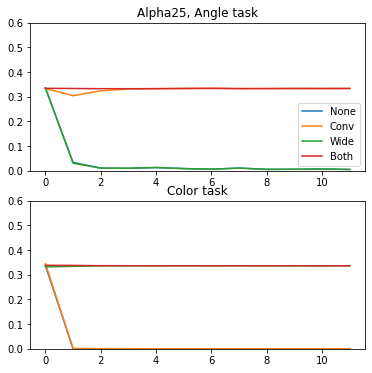

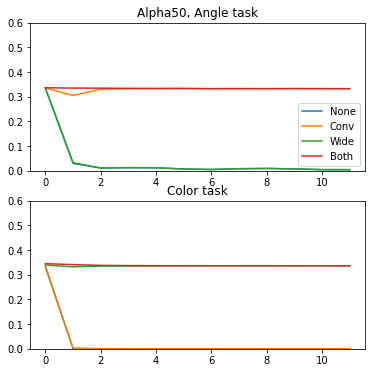

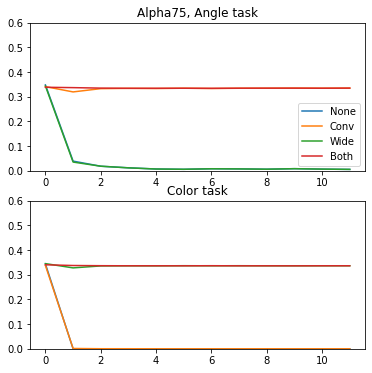

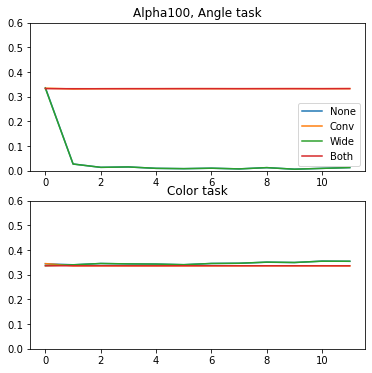

In [18]:
for a,alph in enumerate(np.arange(0,101,25)):
    fig,ax = plt.subplots(2)
    fig.set_size_inches((6,6))
    lesions = ['None','Conv','Wide','Both']
    for i in range(2):
        for l in range(4):
            ax[i].plot(alphas[a][l,i,:,0].T,label=lesions[l])
        ax[i].set_ylim([0,.6])
    ax[0].set_title(f'Alpha{alph}, Angle task')
    ax[1].set_title('Color task')
    ax[0].legend();
    plt.savefig(f'./data/Figure 2/Alpha{alph}.svg')

In [4]:
mts,sts = [],[]
for t in range(2):
    mts.append(np.vstack([np.mean(alphas[i][:,t,-1,:], axis=1) for i in range(5)]).T)
    sts.append(np.vstack([np.std(alphas[i][:,t,-1,:], axis=1) for i in range(5)]).T)

In [5]:
mts[0]

array([[0.81882556, 0.00829718, 0.00738137, 0.00760048, 0.00928883],
       [0.81422448, 0.33598664, 0.33666329, 0.33870938, 0.33348004],
       [0.34304121, 0.00830634, 0.00737527, 0.00760635, 0.00929039],
       [0.33740166, 0.33603537, 0.33667945, 0.33869071, 0.33348931]])

In [6]:
sts[0]

array([[0.39886121, 0.00406004, 0.00440545, 0.00147864, 0.00521398],
       [0.40637308, 0.00486411, 0.00450438, 0.00537357, 0.00074021],
       [0.01880892, 0.00407337, 0.00438743, 0.00147577, 0.00521485],
       [0.00456124, 0.00482502, 0.0044873 , 0.00562272, 0.00074083]])

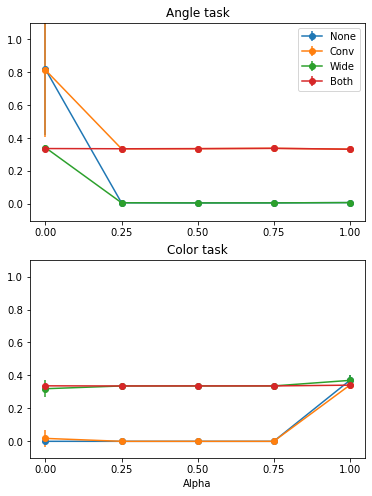

In [49]:
fig,ax = plt.subplots(2)
fig.set_size_inches((6,8))
for j in range(2):
    for i in range(4):
        ax[j].errorbar(np.arange(0,1.1,.25),mts[j][i,:],yerr=sts[j][i,:],marker='o',label=lesions[i])
    ax[j].set_xticks(np.arange(0,1.1,.25))
    ax[j].set_ylim((-.1,1.1))
ax[0].legend();
ax[0].set_title('Angle task')
ax[1].set_title('Color task')
ax[1].set_xlabel('Alpha')

plt.savefig('./data/Figure 2/FinalScores.svg')

# Figure 3

In [7]:
alphas = [np.load(f'./data/Figure 3/Results_alpha{a}.npy') for a in np.arange(0,101,25)]

In [ ]:
# The items are arrays: [num_lesions, task, epoch number, seed].
# Gabor tasks are angle, color or angle, size.

In [6]:
alphas[0].shape

(4, 2, 12, 5)

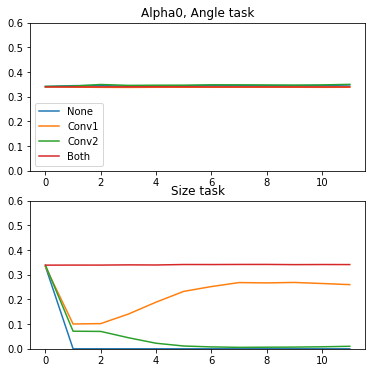

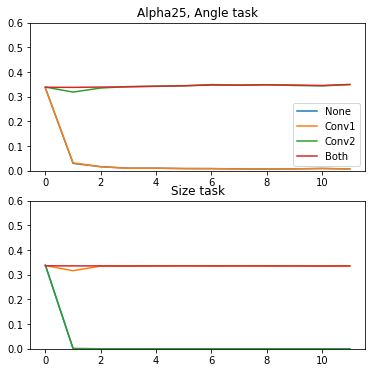

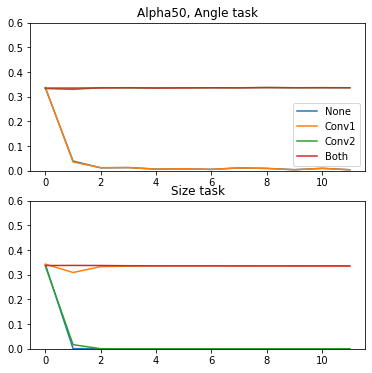

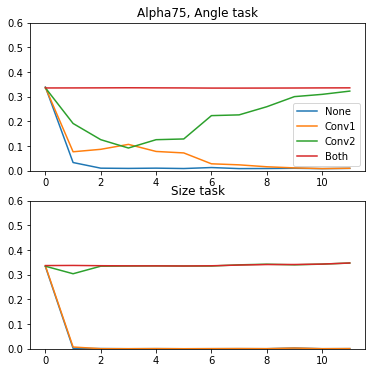

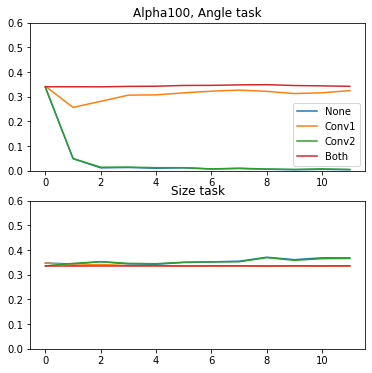

In [131]:
for a,alph in enumerate(np.arange(0,101,25)):
    fig,ax = plt.subplots(2)
    fig.set_size_inches((6,6))
    lesions = ['None','Conv1','Conv2','Both']
    for i in range(2):
        for l in range(4):
            ax[i].plot(alphas[a][l,i,:,4].T,label=lesions[l])
        ax[i].set_ylim([0,.6])
    ax[0].set_title(f'Alpha{alph}, Angle task')
    ax[1].set_title('Size task')
    ax[0].legend();
    plt.savefig(f'./data/Figure 3/Alpha{alph}.svg')

In [8]:
# For each seed, sort the nets so the first one has the higher error for the angle task
for i in range(5):
    for a in range(5):
        if alphas[a][1,1,-1,i] < alphas[a][2,1,-1,i]:
            t = np.copy(alphas[a][2,:,-1,i])
            alphas[a][2,:,-1,i] = np.copy(alphas[a][1,:,-1,i])
            alphas[a][1,:,-1,i] = t

In [9]:
mts,sts = [],[]
for t in range(2):
    mts.append(np.vstack([np.mean(alphas[i][:,t,-1,:], axis=1) for i in range(5)]).T)
    sts.append(np.vstack([np.std(alphas[i][:,t,-1,:], axis=1) for i in range(5)]).T)

In [13]:
mts[0]

array([[0.34622861, 0.00836211, 0.00792273, 0.00723316, 0.00716144],
       [0.34379824, 0.00880273, 0.0497888 , 0.12781717, 0.02009308],
       [0.34471944, 0.32898214, 0.27244147, 0.19545592, 0.28567344],
       [0.3373158 , 0.33955724, 0.33812968, 0.33565783, 0.33755646]])

In [11]:
sts[0]

array([[0.00447462, 0.00439309, 0.00364175, 0.00177627, 0.00339334],
       [0.00844794, 0.00403795, 0.08316631, 0.1473221 , 0.02735903],
       [0.00330432, 0.01660743, 0.1229074 , 0.15251142, 0.07767985],
       [0.00158932, 0.00555846, 0.00224905, 0.00058381, 0.00245913]])

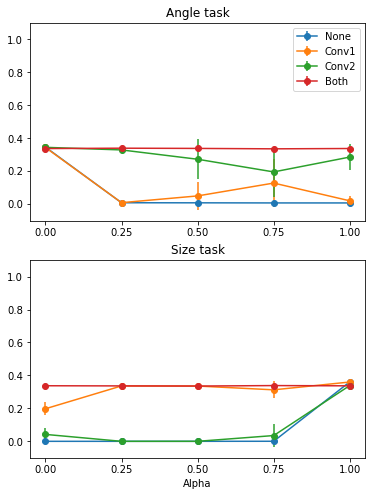

In [139]:
fig,ax = plt.subplots(2)
fig.set_size_inches((6,8))
for j in range(2):
    for i in range(4):
        ax[j].errorbar(np.arange(0,1.1,.25),mts[j][i,:],yerr=sts[j][i,:],marker='o',label=lesions[i])
    ax[j].set_xticks(np.arange(0,1.1,.25))
    ax[j].set_ylim((-.1,1.1))
ax[0].legend();
ax[0].set_title('Angle task')
ax[1].set_title('Size task')
ax[1].set_xlabel('Alpha')

plt.savefig('./data/Figure 3/FinalScores_sortedbysize.svg')

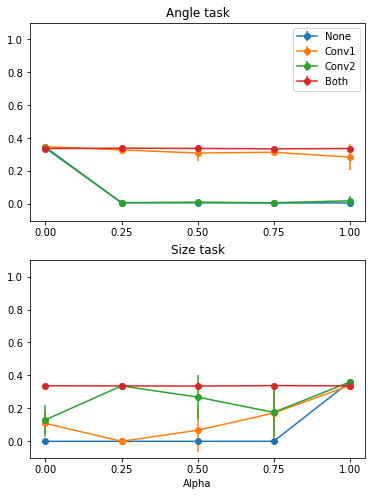

In [136]:
fig,ax = plt.subplots(2)
fig.set_size_inches((6,8))
for j in range(2):
    for i in range(4):
        ax[j].errorbar(np.arange(0,1.1,.25),mts[j][i,:],yerr=sts[j][i,:],marker='o',label=lesions[i])
    ax[j].set_xticks(np.arange(0,1.1,.25))
    ax[j].set_ylim((-.1,1.1))
ax[0].legend();
ax[0].set_title('Angle task')
ax[1].set_title('Size task')
ax[1].set_xlabel('Alpha')

plt.savefig('./data/Figure 3/FinalScores_sortedbyangle.svg')

# Figure 4

One epoch, ten epochs, then summary. Summary figure made here.

In [14]:
alts = []
alts_mu, alts_sig = np.zeros((4,4,2)), np.zeros((4,4,2))
for a_i,a in enumerate([1,5,10,20]):
    alts.append(np.zeros((10,4,2)))
    for s in range(10):
        alts[a_i][s,:,:] = np.load(f'./data/Figure 4/Models/Alt{a}_start0_seed{s}_epoch499.npy')
        if alts[a_i][s,1,0] > alts[a_i][s,2,0]:
            alts[a_i][s,1,:], alts[a_i][s,2,:] = np.copy(alts[a_i][s,2,:]), np.copy(alts[a_i][s,1,:])
    alts_mu[a_i,:,:] = np.mean(alts[a_i],axis=0)
    alts_sig[a_i,:,:] = np.std(alts[a_i],axis=0)

In [15]:
alts_mu

array([[[0.0065104 , 0.05714416],
        [0.00650057, 0.3391299 ],
        [0.33919394, 0.0574818 ],
        [0.33920342, 0.33908127]],

       [[0.00713376, 0.02918378],
        [0.00721195, 0.41260674],
        [0.34120188, 0.14258011],
        [0.34215892, 0.34200865]],

       [[0.08352235, 0.06492058],
        [0.12470272, 0.22238351],
        [0.24525033, 0.13619634],
        [0.33969742, 0.3377532 ]],

       [[0.09865656, 0.06567574],
        [0.14132328, 0.22262531],
        [0.25724372, 0.13613833],
        [0.34569415, 0.33806751]]])

In [16]:
alts_sig

array([[[0.00173819, 0.17139258],
        [0.00174011, 0.0046427 ],
        [0.00384675, 0.17239619],
        [0.00365079, 0.00451165]],

       [[0.00245042, 0.08716722],
        [0.00257833, 0.29033505],
        [0.01264013, 0.21261318],
        [0.01207022, 0.00981905]],

       [[0.01888291, 0.01314706],
        [0.03323158, 0.02818263],
        [0.03304833, 0.02162084],
        [0.00341363, 0.00142004]],

       [[0.02691183, 0.01446447],
        [0.03647042, 0.027736  ],
        [0.02627905, 0.02938186],
        [0.00867249, 0.00244721]]])

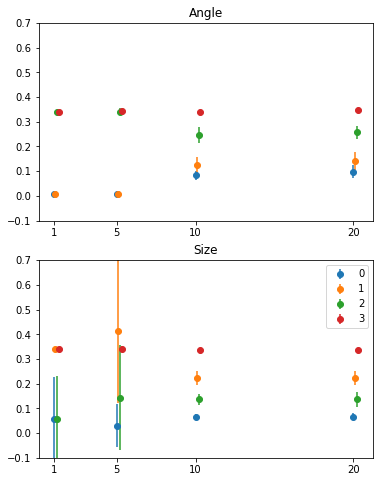

In [142]:
fig,ax = plt.subplots(2)
fig.set_size_inches((6,8))
for t in range(2):
    for l in range(4):
        ax[t].errorbar(np.array([1,5,10,20])+l*.1, alts_mu[:,l,t], alts_sig[:,l,t],marker='o',linestyle='',label=l)
    ax[t].set_ylim((-.1,.7))
    ax[t].set_xticks([1,5,10,20])
ax[0].set_title('Angle')
ax[1].set_title('Size')
plt.legend();
plt.savefig('./data/Figure 4/TotalScoresAlt.svg')